In [32]:
from collections import defaultdict
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


with open('laureati_nel_mondo_field.csv', 'r') as data_file:
  data_reader = csv.reader(data_file, delimiter =',', quotechar ='"')
  data = list(data_reader)[1:]

data = pd.read_csv('laureati_nel_mondo_field.csv', sep=',', index_col=0)
data = data.reset_index()

sdata = data[['Country', 'SEX', 'Field', 'Education level', 'Year', 'Value']]
#sdata

scdata = sdata.dropna(subset=['Value'])
scdata

,Country,SEX,Field,Education level,Year,Value
0,Slovenia,F,Generic programmes and qualifications,Upper secondary vocational education,2013,0.0
1,Slovenia,F,Generic programmes and qualifications,Upper secondary vocational education,2014,0.0
2,Slovenia,F,Generic programmes and qualifications,Upper secondary vocational education,2015,0.0
3,Slovenia,F,Generic programmes and qualifications,Upper secondary vocational education,2016,0.0
4,Slovenia,F,Generic programmes and qualifications,Upper secondary vocational education,2017,0.0
...,...,...,...,...,...,...
71813,Bulgaria,M,"Social sciences, journalism and information",Doctoral or equivalent level,2016,74.0
71814,Bulgaria,M,"Social sciences, journalism and information",Doctoral or equivalent level,2018,94.0
71815,Bulgaria,M,"Social sciences, journalism and information",Doctoral or equivalent level,2019,99.0
71816,Bulgaria,M,"Social sciences, journalism and information",Doctoral or equivalent level,2020,86.0


# Mappa cloropleta: quantità di donne laureate per paese

In [33]:
Q = scdata.query('SEX == "F"', inplace=True)
Q = scdata.query('Year == 2021')
newQ = Q

#newQ = Q.groupby(['Country'])['Value'].sum()
fig = px.choropleth(newQ, locations='Country', locationmode='country names', color='Value', projection='natural earth', title='Laureate per paese', 
                    range_color = (0, 50000), color_continuous_scale=('PowderBlue', 'Blue', 'SlateBlue'))

newQ
fig.show()


C:\Users\ruiza\AppData\Local\Temp\ipykernel_14496\2721593325.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Bar graph: differenza tra donne e uomini in STEM

In [34]:
scdata['Country'].unique()

array(['Slovenia', 'Finland', 'France', 'Switzerland', 'Luxembourg',
       'Chile', 'Slovak Republic', 'Lithuania', 'Ireland', 'Korea',
       'Hungary', 'Germany', 'Belgium', 'Iceland', 'Colombia', 'Portugal',
       'New Zealand', 'Czechia', 'United Kingdom', 'Norway', 'Latvia',
       'Greece', 'Italy', 'Estonia', 'Spain', 'Poland', 'Israel',
       'Denmark', 'Türkiye', 'Sweden', 'Australia', 'Japan', 'Austria',
       'Brazil', 'Canada', 'Netherlands', 'United States', 'Mexico',
       'Croatia', 'Costa Rica', 'Bulgaria', 'Romania'], dtype=object)

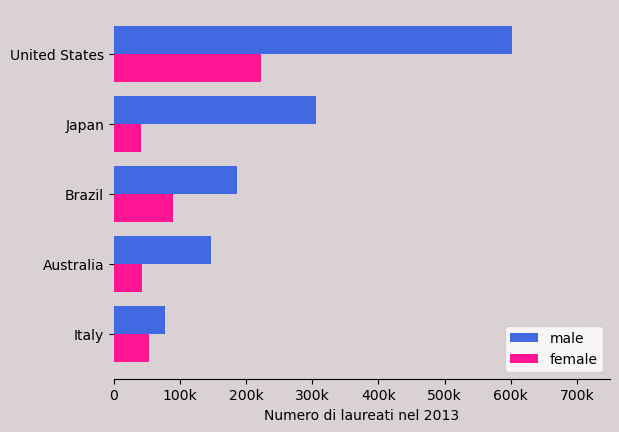

In [35]:
NMS = sdata[sdata['Field'] == "Natural sciences, mathematics and statistics"]
ICT = sdata[sdata['Field'] == "Information and Communication Technologies (ICTs)"]
EMC = sdata[sdata['Field'] == "Engineering, manufacturing and construction"]

STEMdata = pd.concat([NMS, ICT, EMC])
STEMdata = STEMdata.groupby(['Country', 'SEX', 'Year'])['Value'].sum()


STEMdata = STEMdata.reset_index()

STEMdata13 = (STEMdata[STEMdata['Year'] == 2013])
STEMdata15 = (STEMdata[STEMdata['Year'] == 2015])
STEMdata17 = (STEMdata[STEMdata['Year'] == 2017])
STEMdata19 = (STEMdata[STEMdata['Year'] == 2019])
STEMdata21 = (STEMdata[STEMdata['Year'] == 2021])

STEMdata5 = pd.concat([STEMdata13, STEMdata15, STEMdata17, STEMdata19, STEMdata21])

STEMdata5IT = STEMdata5[STEMdata5['Country'] == 'Italy']
STEMdata5US = STEMdata5[STEMdata5['Country'] == 'United States']
STEMdata5BR = STEMdata5[STEMdata5['Country'] == 'Brazil']
STEMdata5JP = STEMdata5[STEMdata5['Country'] == 'Japan']
STEMdata5AU = STEMdata5[STEMdata5['Country'] == 'Australia']

STEMdata51 = pd.concat([STEMdata5IT, STEMdata5US, STEMdata5BR, STEMdata5JP, STEMdata5AU])

STEMdata513 = STEMdata51.query('Year == 2013')
f =STEMdata513[STEMdata513['SEX']=='F']
#f = f.sort_values(by = ['Value'])
m = STEMdata513[STEMdata513['SEX']=='M']
m = m.sort_values(by = ['Value'])

plt.figure(facecolor='#DAD1D5')
ax = plt.axes()
ax.set_facecolor("#DAD1D5")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.barh(y = m['Country'], width=m['Value'], color = 'RoyalBlue', align = 'edge', height= 0.4, tick_label=m['Year'])
plt.barh(y = f['Country'], width=f['Value'], color ='DeepPink', align = 'edge', height= -0.4, tick_label=f['Year'])   


plt.yticks([r for r in range(len(f['Country']))], m['Country'])
plt.xlim(0, 750000)
plt.xticks(ticks= [0, 100000,200000, 300000, 400000, 500000, 600000, 700000], labels = [0, '100k','200k', '300k', '400k', '500k', '600k', '700k'])
plt.xlabel("Numero di laureati nel 2013")


plt.legend(['male','female'])

Text(0.5, 0, 'Numero di laureati nel 2015')

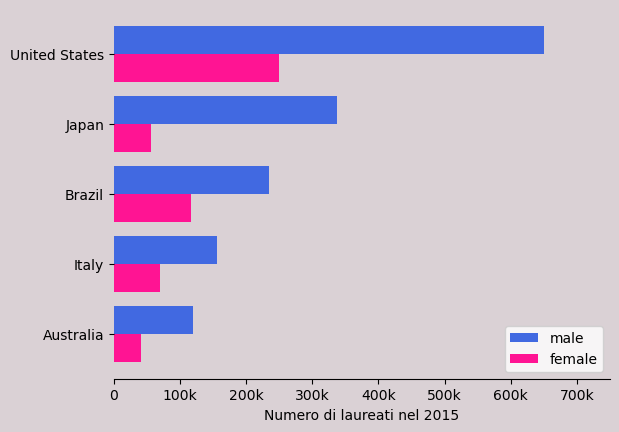

In [36]:
STEMdata513 = STEMdata51.query('Year == 2015')
f =STEMdata513[STEMdata513['SEX']=='F']
#f = f.sort_values(by = ['Value'])
m = STEMdata513[STEMdata513['SEX']=='M']
m = m.sort_values(by = ['Value'])

plt.figure(facecolor='#DAD1D5')
ax = plt.axes()
ax.set_facecolor("#DAD1D5")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.barh(y = m['Country'], width=m['Value'], color = 'RoyalBlue', align = 'edge', height= 0.4, tick_label=m['Year'])
plt.barh(y = f['Country'], width=f['Value'], color ='DeepPink', align = 'edge', height= -0.4, tick_label=f['Year'])   


plt.yticks([r for r in range(len(f['Country']))], m['Country'])
plt.xlim(0, 750000)
plt.xticks(ticks= [0, 100000,200000, 300000, 400000, 500000, 600000, 700000], labels = [0, '100k','200k', '300k', '400k', '500k', '600k', '700k'])
plt.legend(['male','female'])
plt.xlabel("Numero di laureati nel 2015")

Text(0.5, 0, 'Numero di laureati nel 2017')

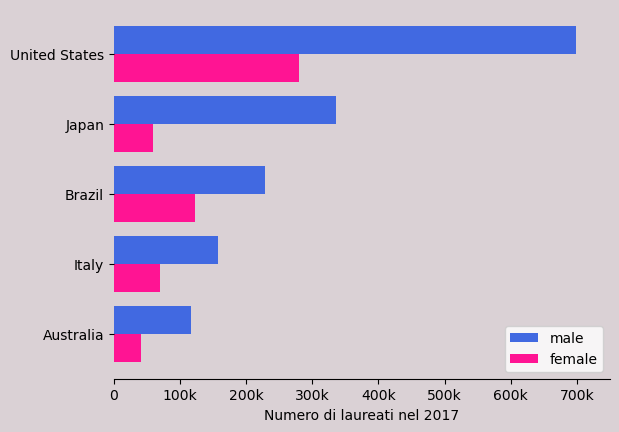

In [37]:
STEMdata513 = STEMdata51.query('Year == 2017')
f =STEMdata513[STEMdata513['SEX']=='F']
#f = f.sort_values(by = ['Value'])
m = STEMdata513[STEMdata513['SEX']=='M']
m = m.sort_values(by = ['Value'])

plt.figure(facecolor='#DAD1D5')
ax = plt.axes()
ax.set_facecolor("#DAD1D5")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.barh(y = m['Country'], width=m['Value'], color = 'RoyalBlue', align = 'edge', height= 0.4, tick_label=m['Year'])
plt.barh(y = f['Country'], width=f['Value'], color ='DeepPink', align = 'edge', height= -0.4, tick_label=f['Year'])   


plt.yticks([r for r in range(len(f['Country']))], m['Country'])
plt.xlim(0, 750000)
plt.xticks(ticks= [0, 100000,200000, 300000, 400000, 500000, 600000, 700000], labels = [0, '100k','200k', '300k', '400k', '500k', '600k', '700k'])
plt.legend(['male','female'])
plt.xlabel("Numero di laureati nel 2017")

Text(0.5, 0, 'Numero di laureati nel 2019')

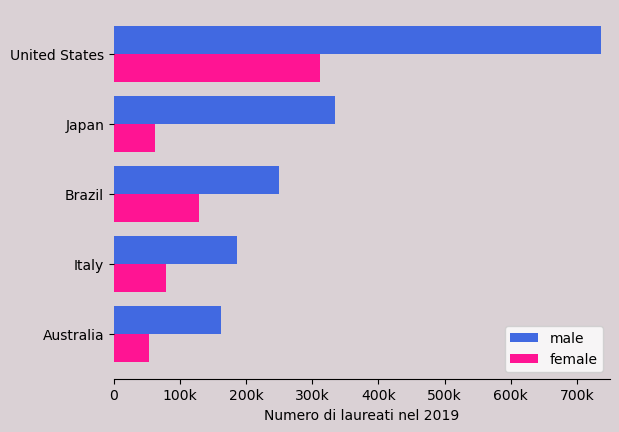

In [38]:
STEMdata513 = STEMdata51.query('Year == 2019')
f =STEMdata513[STEMdata513['SEX']=='F']
#f = f.sort_values(by = ['Value'])

plt.figure(facecolor='#DAD1D5')
ax = plt.axes()
ax.set_facecolor("#DAD1D5")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

m = STEMdata513[STEMdata513['SEX']=='M']
m = m.sort_values(by = ['Value'])
plt.barh(y = m['Country'], width=m['Value'], color = 'RoyalBlue', align = 'edge', height= 0.4, tick_label=m['Year'])
plt.barh(y = f['Country'], width=f['Value'], color ='DeepPink', align = 'edge', height= -0.4, tick_label=f['Year'])   


plt.yticks([r for r in range(len(f['Country']))], m['Country'])
plt.xlim(0, 750000)
plt.xticks(ticks= [0, 100000,200000, 300000, 400000, 500000, 600000, 700000], labels = [0, '100k','200k', '300k', '400k', '500k', '600k', '700k'])

plt.legend(['male','female'])
plt.xlabel("Numero di laureati nel 2019")

Text(0.5, 0, 'Numero di laureati nel 2021')

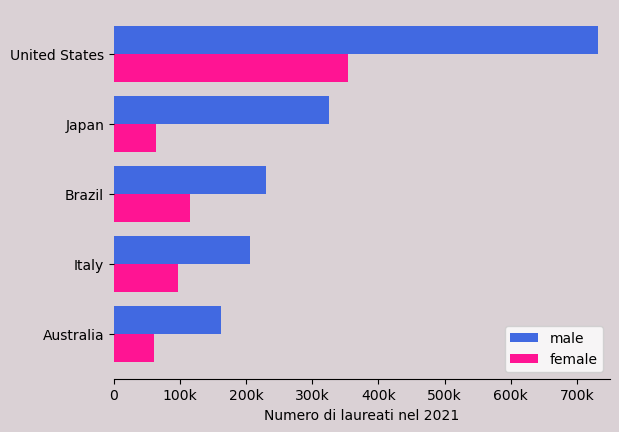

In [39]:
STEMdata513 = STEMdata51.query('Year == 2021')
f =STEMdata513[STEMdata513['SEX']=='F']
#f = f.sort_values(by = ['Value'])
m = STEMdata513[STEMdata513['SEX']=='M']
m = m.sort_values(by = ['Value'])

plt.figure(facecolor='#DAD1D5')
ax = plt.axes()
ax.set_facecolor("#DAD1D5")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.barh(y = m['Country'], width=m['Value'], color = 'RoyalBlue', align = 'edge', height= 0.4, tick_label=m['Year'])
plt.barh(y = f['Country'], width=f['Value'], color ='DeepPink', align = 'edge', height= -0.4, tick_label=f['Year'])   


plt.yticks([r for r in range(len(f['Country']))], m['Country'])

plt.xlim(0, 750000)
plt.xticks(ticks= [0, 100000,200000, 300000, 400000, 500000, 600000, 700000], labels = [0, '100k','200k', '300k', '400k', '500k', '600k', '700k'])

plt.legend(['male','female'])
plt.xlabel("Numero di laureati nel 2021")


# Line graph

<Figure size 900x600 with 0 Axes>

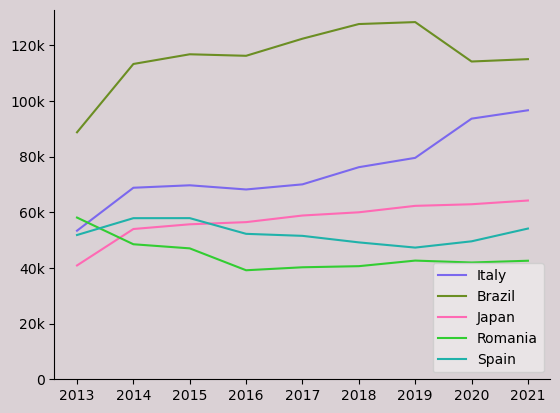

In [40]:
STEMdataIT = STEMdata[STEMdata['Country'] == 'Italy']
STEMdataUS = STEMdata[STEMdata['Country'] == 'United States']
STEMdataBR = STEMdata[STEMdata['Country'] == 'Brazil']
STEMdataJP = STEMdata[STEMdata['Country'] == 'Japan']
STEMdataAU = STEMdata[STEMdata['Country'] == 'Australia']
STEMdataSP = STEMdata[STEMdata['Country'] == 'Spain']
STEMdataRO = STEMdata[STEMdata['Country'] == 'Romania']

STEMdataLG = pd.concat([STEMdataIT,STEMdataUS,STEMdataBR,STEMdataJP,STEMdataAU])

STEMdataITF = STEMdataIT[STEMdataIT['SEX'] == 'F']
STEMdataUSF = STEMdataUS[STEMdataUS['SEX'] == 'F']
STEMdataBRF = STEMdataBR[STEMdataBR['SEX'] == 'F']
STEMdataJPF = STEMdataJP[STEMdataJP['SEX'] == 'F']
STEMdataAUF = STEMdataAU[STEMdataAU['SEX'] == 'F']
STEMdataSPF = STEMdataSP[STEMdataSP['SEX'] == 'F']
STEMdataROF = STEMdataRO[STEMdataRO['SEX'] == 'F']

plt.figure(figsize = (9, 6))
plt.figure(facecolor='#DAD1D5')
ax = plt.axes()
ax.set_facecolor("#DAD1D5")
plt.plot(STEMdataITF['Year'], STEMdataITF['Value'], color='mediumslateblue')
#plt.plot(STEMdataUSF['Year'], STEMdataUSF['Value'], color='Blue')
plt.plot(STEMdataBRF['Year'], STEMdataBRF['Value'], color='OliveDrab')
plt.plot(STEMdataJPF['Year'], STEMdataJPF['Value'], color='hotpink')
plt.plot(STEMdataROF['Year'], STEMdataROF['Value'], color='limegreen')
plt.plot(STEMdataSPF['Year'], STEMdataSPF['Value'], color='lightseagreen')
plt.yticks(ticks= [0, 20000, 40000, 60000, 80000, 100000, 120000], labels = [0, '20k', '40k','60k', '80k', '100k', '120k'])
plt.legend(['Italy', 'Brazil', 'Japan', 'Romania', 'Spain'], loc = 'lower right', facecolor='#eeeaeb')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)

<Figure size 3000x1000 with 0 Axes>

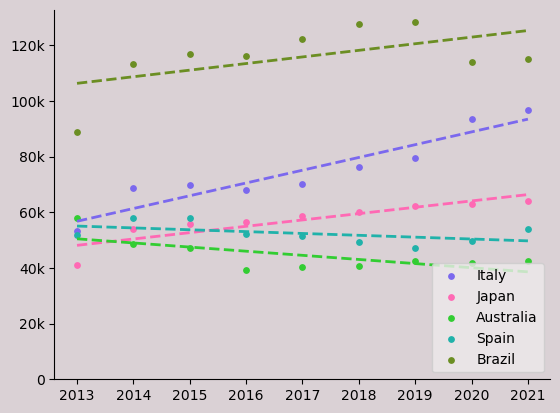

In [41]:
#plt.figure(figsize = (12, 6))
plt.figure(figsize = (30, 10))
plt.figure(facecolor='#DAD1D5')
ax = plt.axes()
ax.set_facecolor("#DAD1D5")


S1 = plt.scatter(STEMdataITF['Year'], STEMdataITF['Value'],color='mediumslateblue',s=15)
z = np.polyfit(STEMdataITF['Year'], STEMdataITF['Value'], 1)
p = np.poly1d(z)
plt.plot(STEMdataITF['Year'], p(STEMdataITF['Year']),color="mediumslateblue", linewidth=2, linestyle="--")

S2 = plt.scatter(STEMdataJPF['Year'], STEMdataJPF['Value'], color = 'hotpink',s=15)
a = np.polyfit(STEMdataJPF['Year'], STEMdataJPF['Value'], 1)
b = np.poly1d(a)
plt.plot(STEMdataJPF['Year'], b(STEMdataJPF['Year']),color="hotpink", linewidth=2, linestyle="--")

S3 = plt.scatter(STEMdataROF['Year'], STEMdataROF['Value'], color = 'limegreen',s=15)
c = np.polyfit(STEMdataROF['Year'], STEMdataROF['Value'], 1)
d = np.poly1d(c)
plt.plot(STEMdataROF['Year'], d(STEMdataROF['Year']),color="limegreen", linewidth=2, linestyle="--")

S4 = plt.scatter(STEMdataSPF['Year'], STEMdataSPF['Value'], color = 'lightseagreen', s=15)
e = np.polyfit(STEMdataSPF['Year'], STEMdataSPF['Value'], 1)
f = np.poly1d(e)
plt.plot(STEMdataSPF['Year'], f(STEMdataSPF['Year']),color="lightseagreen", linewidth=2, linestyle="--")

S5 = plt.scatter(STEMdataBRF['Year'], STEMdataBRF['Value'], color = 'OliveDrab', s=15)
g = np.polyfit(STEMdataBRF['Year'], STEMdataBRF['Value'], 1)
h = np.poly1d(g)
plt.plot(STEMdataBRF['Year'], h(STEMdataBRF['Year']),color="OliveDrab", linewidth=2, linestyle="--")

plt.yticks(ticks= [0,20000, 40000, 60000, 80000, 100000, 120000], labels = [0,'20k', '40k','60k', '80k', '100k', '120k'])
plt.legend([S1, S2, S3, S4, S5],['Italy','Japan', 'Australia','Spain','Brazil'], loc = 'lower right', facecolor='#eeeaeb')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


# Bar graph pt.2

C:\Users\ruiza\AppData\Local\Temp\ipykernel_14496\3457448224.py:34: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\ruiza\AppData\Local\Temp\ipykernel_14496\3457448224.py:35: UserWarning:

FixedFormatter should only be used together with FixedLocator



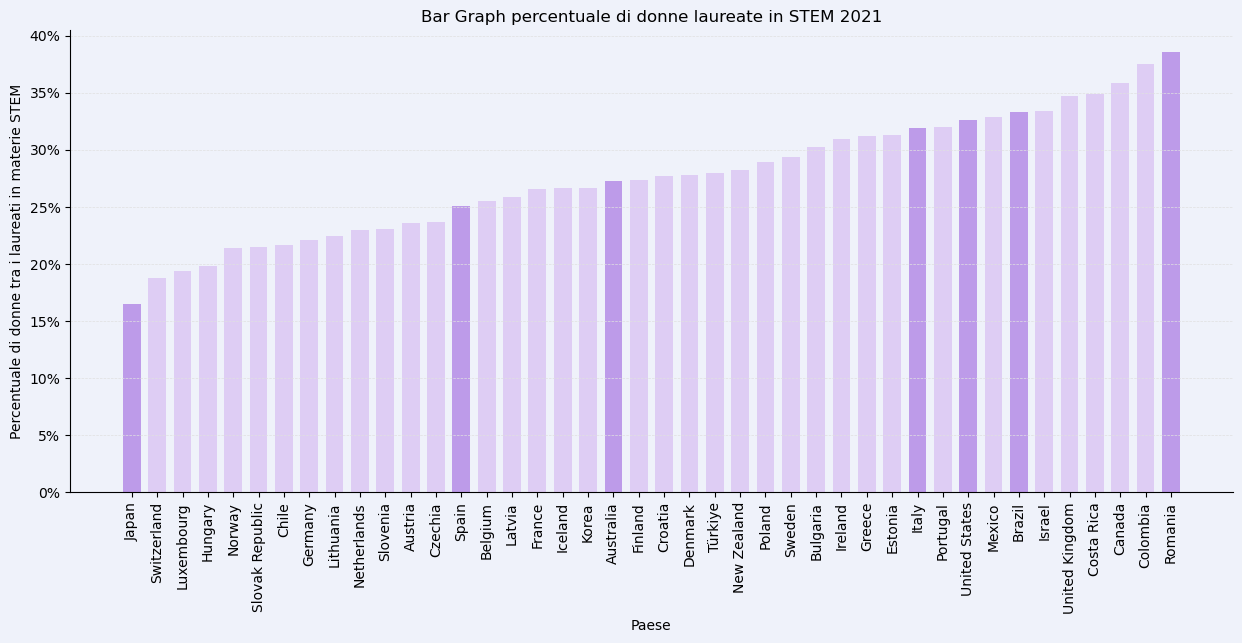

In [53]:
STEMdata21 = STEMdata21.groupby(['Country','SEX', 'Year'])['Value'].sum()
STEMdata21 = STEMdata21.reset_index()

STEMdata21
STEMdataT = STEMdata21.groupby(['Country','Year'])['Value'].sum()

STEMdataT = STEMdataT.reset_index()
STEMdataT = STEMdataT.rename(columns={'Value': 'Total'})

STEMdata21F = STEMdata21.query('SEX == "F"').reset_index()
STEMdata21FF = STEMdata21F

STEMdata21F = pd.concat([STEMdata21F, STEMdataT['Total']], axis = 1, ignore_index=False, verify_integrity=True)

STEMdata21F = STEMdata21F.rename(columns={0: 'Country'})
STEMdata21F = STEMdata21F.rename(columns={1: 'SEX'})
STEMdata21F = STEMdata21F.rename(columns={2: 'Year'})
STEMdata21F = STEMdata21F.rename(columns={3: 'Value'})
STEMdata21F = STEMdata21F.rename(columns={4: 'Total'})
STEMdataPerF = STEMdata21F

STEMdataPerF['Percentage'] = (STEMdata21F['Value'] / STEMdata21F['Total']) * 100

STEMdataPerF = STEMdataPerF.sort_values(by=['Percentage'])

fig, ax = plt.subplots(1, 1, figsize=(15, 6), facecolor='#EFF2FA')
ax.set_facecolor("#EFF2FA")
plt.grid(axis='y', color = '#E0E0E0', linestyle = '--', linewidth = 0.5)
ax.bar(x=STEMdataPerF['Country'], height=STEMdataPerF['Percentage'], width = 0.7, 
       color =['#BD9BE9' if (c == 'Italy' or c == 'Japan' or c == 'Romania' or c == 'United States' or c == 'Brazil' or c == 'Australia' or c == 'Spain')
                else '#DECDF4' for c in STEMdataPerF['Country']])


ax.set_xticklabels(labels=STEMdataPerF['Country'],rotation=90)
ax.set_yticklabels(labels=['0%', '5%', '10%', '15%','20%', '25%','30%', '35%','40%'])
ax.set_title('Bar Graph percentuale di donne laureate in STEM 2021')
ax.set_xlabel('Paese')
ax.set_ylabel('Percentuale di donne tra i laureati in materie STEM')


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

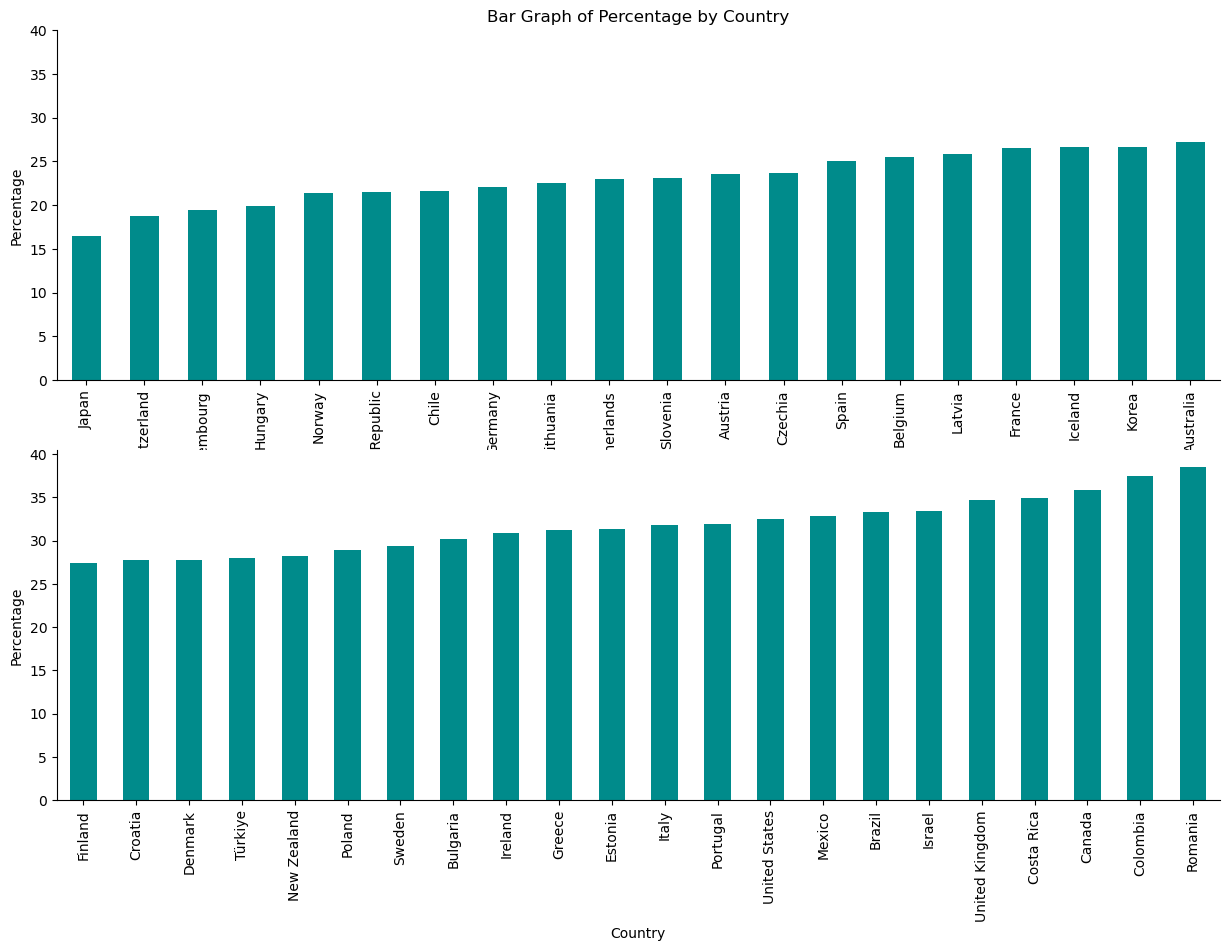

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Assuming STEMdataPerF is your DataFrame
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))

plt.figure(facecolor='#DAD1D5')
# Plot the first 20 bars
STEMdataPerF.iloc[:20].plot(kind='bar', x='Country', y='Percentage', ax=axes[0], legend=False, color='darkcyan')
axes[0].set_ylim(0,40)
axes[0].set_title('Bar Graph of Percentage by Country')
#axes[0].spines['bottom'].set_visible(False)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].set_xlabel('')
axes[0].set_ylabel('Percentage')

# Plot the next 20 bars
STEMdataPerF.iloc[20:].plot(kind='bar', x='Country', y='Percentage', ax=axes[1], legend=False, color='darkcyan')
#axes[1].set_title('Bar Graph of Percentage by Country (Part 2)')
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Percentage')
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

# Adjust layout to prevent clipping of ylabel
plt.tight_layout()

# Show the plots
plt.show()


,Country,SEX,Year,Value,Total,Percentage
293,Romania,F,2013,58104.0,158232.0,NaN
294,Romania,F,2014,48514.0,131905.0,NaN
295,Romania,F,2015,47038.0,128455.0,NaN
296,Romania,F,2016,39171.0,107184.0,NaN
297,Romania,F,2017,40243.0,108731.0,NaN
298,Romania,F,2018,40639.0,106126.0,NaN
299,Romania,F,2019,42644.0,109388.0,NaN
300,Romania,F,2020,41959.0,110675.0,NaN
301,Romania,F,2021,42591.0,110476.0,NaN


<Figure size 900x600 with 0 Axes>

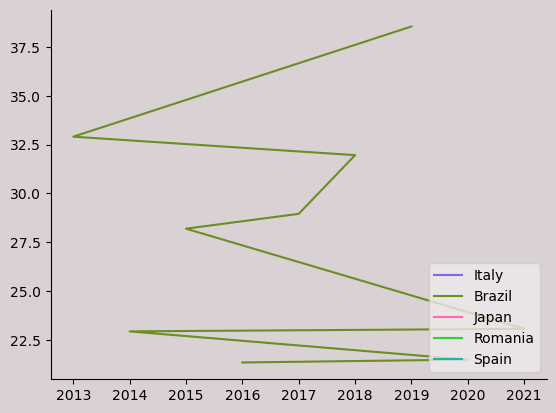

In [ ]:
STEMdata = STEMdata.groupby(['Country','SEX', 'Year'])['Value'].sum()
STEMdata = STEMdata.reset_index()

STEMdata
STEMdataTT = STEMdata.groupby(['Country','Year'])['Value'].sum()

STEMdataTT = STEMdataTT.reset_index()
STEMdataTT = STEMdataTT.rename(columns={'Value': 'Total'})

STEMdataF = STEMdata.query('SEX == "F"').reset_index()
STEMdataFF = STEMdataF

STEMdataF = pd.concat([STEMdataF, STEMdataTT['Total']], axis = 1, ignore_index=False, verify_integrity=True)

STEMdataF = STEMdataF.rename(columns={0: 'Country'})
STEMdataF = STEMdataF.rename(columns={1: 'SEX'})
STEMdataF = STEMdataF.rename(columns={2: 'Year'})
STEMdataF = STEMdataF.rename(columns={3: 'Value'})
STEMdataF = STEMdataF.rename(columns={4: 'Total'})
STEMdataPerF = STEMdataF

STEMdataPerF['Percentage'] = (STEMdata21F['Value'] / STEMdata21F['Total']) * 100

STEMdataPerF = STEMdataPerF.sort_values(by=['Percentage'])

STEMdataPerF.reset_index()
STEMdataPerF = STEMdataPerF.drop(columns='index', axis=1)

STEMdataPerF.reset_index()

JP = STEMdataPerF.query('Country == "Japan"')
IT = STEMdataPerF.query('Country == "Italy"')
RO = STEMdataPerF.query('Country == "Romania"')
BR = STEMdataPerF.query('Country == "Brazil"')
SP = STEMdataPerF.query('Country == "Spain"')

plt.figure(figsize = (9, 6))
plt.figure(facecolor='#DAD1D5')
ax = plt.axes()
ax.set_facecolor("#DAD1D5")
plt.plot(IT['Year'], IT['Percentage'], color='mediumslateblue')
#plt.plot(STEMdataUSF['Year'], STEMdataUSF['Value'], color='Blue')
plt.plot(BR['Year'], BR['Percentage'], color='OliveDrab')
plt.plot(JP['Year'], JP['Percentage'], color='hotpink')
plt.plot(RO['Year'], RO['Percentage'], color='limegreen')
plt.plot(SP['Year'], SP['Percentage'], color='lightseagreen')
#plt.yticks(ticks= [0, 20000, 40000, 60000, 80000, 100000, 120000], labels = [0, '20k', '40k','60k', '80k', '100k', '120k'])
plt.legend(['Italy', 'Brazil', 'Japan', 'Romania', 'Spain'], loc = 'lower right', facecolor='#eeeaeb')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

RO